# Learner algorithm for wh-dependencies, trigrams of container nodes

Loading in the data and the required packages:

In [1]:
import math
import numpy
import pandas as pd
from nltk.util import ngrams
from nltk.probability import FreqDist
from utils import sentence_text, write_file
from learner_functions import get_ngrams, get_freq_dist, get_prob, plot_log_prob_simple

In [2]:
path = "/Users/anastasia/Library/CloudStorage/OneDrive-NTNU/NorGramBank/data/output_wh_corrected_oct23.xlsx"
data = pd.read_excel(path)

In [3]:
data.head(10)

,Sent_id,Graph_id,Web_id,Sentence,All_paths,Chosen_path,Comment
0,s101809,s1574_6_c_4524,1574,Hvor mye hadde den steget siden apachene var her?,"['FOCUS-INT', 'ADJUNCT $ SUBJ']",ADJUNCT,MANUALLY CHECKED
1,s109502,s1831_32_c_3924,1831,– Hvordan visste du det var en tier?,"['FOCUS-INT', 'COMP_nominal FOCUS PREDLINK']",ADJUNCT,MANUALLY CHECKED
2,s111181,s1139_0_c_8287,1139,"Følg nå Arne dit bort, så vil han vise Dem hvo...",['FOCUS-INT'],ADJUNCT,MANUALLY CHECKED
3,s118799,s2112_1_c_4579,2112,«Hvorfor tror du at jeg er så fattig?» spør hun.,"['FOCUS-INT', 'COMP_nominal ADJUNCT $']",ADJUNCT,MANUALLY CHECKED
4,s124862,s1471_4_c_5489,1471,Det er jeg som skal bestemme hva tid barna ska...,['FOCUS-INT'],ADJUNCT,MANUALLY CHECKED
5,s128262,s446_5_c_3702,446,«Hvorfor kjøper du ikke en i tabloidformat?,"['FOCUS-INT', 'ADJUNCT $', 'OBJ -- $']",ADJUNCT,MANUALLY CHECKED
6,s130696,s337_22_c_6374,337,Og hvorfor var det noen som ville det?,"['GVN-TOP_rel COMP_rel ADJUNCT $', 'FOCUS-INT']",ADJUNCT,MANUALLY CHECKED
7,s131533,s1025_3_c_9506,1025,«Hvorfor sa du til pappa at jeg visste at du i...,"['FOCUS-INT', 'COMP_nominal ADJUNCT $']",ADJUNCT,MANUALLY CHECKED
8,s132857,s2349_0_c_4627,2349,Men hvordan visste Henry hvor han skulle finne...,"['FOCUS-INT', 'COMP_wh-int XCOMP ADJUNCT $']",ADJUNCT,MANUALLY CHECKED
9,s143041,s553_2_c_3419,553,– Hvordan visste du at vi var her?,"['FOCUS-INT', 'COMP_nominal PREDLINK']",ADJUNCT,MANUALLY CHECKED


## Splitting the data into trigrams and calculating the probabilities of test structures 
### See RC_bigram for data exploration

In [4]:
# Set n-gram window size
n_gram = 3

In [5]:
all_ngrams = []
for string in data['Chosen_path']:
    seq = str(string).split()
    n_grams = get_ngrams(seq, n_gram)
    for ngr in n_grams:
        all_ngrams.append(ngr)
                
freq_dist = get_freq_dist(all_ngrams)
print('20 most common container node n-grams:')
for i in freq_dist.most_common(20):
    print(i)

20 most common container node n-grams:
(('start', 'ADJUNCT', 'end'), 5800)
(('start', 'PREDLINK', 'end'), 3930)
(('start', 'OBJ', 'end'), 2623)
(('XCOMP', 'OBJ', 'end'), 1760)
(('start', 'XCOMP', 'OBJ'), 1643)
(('start', 'SUBJ', 'end'), 1493)
(('XCOMP', 'ADJUNCT', 'end'), 1200)
(('start', 'XCOMP', 'ADJUNCT'), 1161)
(('XCOMP', 'SUBJ', 'end'), 673)
(('start', 'XCOMP', 'SUBJ'), 663)
(('ADJUNCT', 'OBJ', 'end'), 490)
(('start', 'OBL-TH', 'end'), 373)
(('start', 'ADJUNCT', 'OBJ'), 343)
(('start', 'XCOMP', 'PREDLINK'), 312)
(('XCOMP', 'PREDLINK', 'end'), 309)
(('start', 'XCOMP', 'XCOMP'), 264)
(('XCOMP', 'XCOMP', 'ADJUNCT'), 160)
(('XCOMP', 'ADJUNCT', 'OBJ'), 131)
(('XCOMP', 'OBL-TH', 'end'), 126)
(('start', 'XCOMP', 'OBL-TH'), 121)


## Now we start exploring the modeling results by island type
### 1. Subject island

Plotting the modelled probabilities for four experimental conditions from the Sprouse's design

In [6]:
# get_prob returns the probability for a path, the path itself, and a list of unattested n-grams
p_short_1, path1, un1 = get_prob(['SUBJ'], freq_dist, n_gram)  # short no island
p_short_2, path2, un2 = get_prob(['SUBJ'], freq_dist, n_gram)  # short island

['start', 'SUBJ', 'end'] -2.790300046079462 

['start', 'SUBJ', 'end'] -2.790300046079462 



In [7]:
p_long_1, path3, un3 = get_prob(['COMP_nominal', 'SUBJ'], freq_dist, n_gram)  # long no island
p_long_2, path4, un4 = get_prob(['COMP_nominal', 'SUBJ', 'ADJUNCT', 'OBJ'], freq_dist, n_gram)  # long island

['start', 'COMP_nominal', 'SUBJ', 'end'] -21.584649728591142 

['start', 'COMP_nominal', 'SUBJ', 'ADJUNCT', 'OBJ', 'end'] -36.280726997616924 



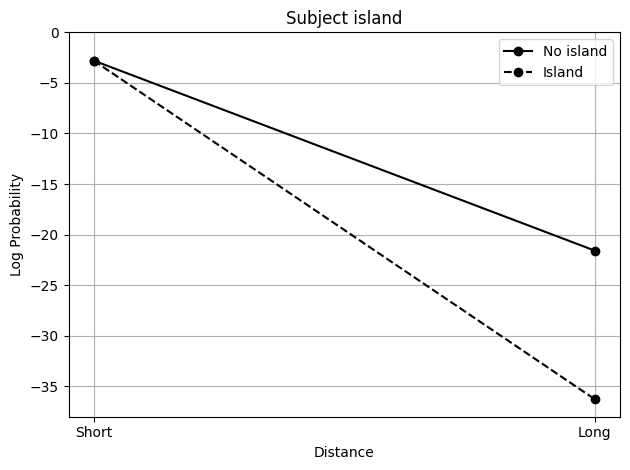

In [8]:
plot_log_prob_simple(p_short_1, p_long_1, p_short_2, p_long_2, title = "Subject island")

In [9]:
condition = []
paths = [" ".join(path1), " ".join(path2), " ".join(path3), " ".join(path4)]
probs = [p_short_1, p_short_2, p_long_1, p_long_2]
unattested = [un1, un2, un3, un4]
condition.extend(["Subject"]*4)

In [10]:
unattested

[[],
 [],
 [('start', 'COMP_nominal', 'SUBJ'), ('COMP_nominal', 'SUBJ', 'end')],
 [('start', 'COMP_nominal', 'SUBJ'),
  ('COMP_nominal', 'SUBJ', 'ADJUNCT'),
  ('SUBJ', 'ADJUNCT', 'OBJ')]]

### 2. CNP island (reported in the Appendix)

In [11]:
# Short conditions are the same as previously
p_long_1, path3, un3 = get_prob(['COMP_nominal', 'OBJ'], freq_dist, n_gram)  # long no island
p_long_2, path4, un4 = get_prob(['OBJ', 'COMP_nominal', 'OBJ'], freq_dist, n_gram)  # long island

['start', 'COMP_nominal', 'OBJ', 'end'] -13.20556983930454 

['start', 'OBJ', 'COMP_nominal', 'OBJ', 'end'] -28.17228197349575 



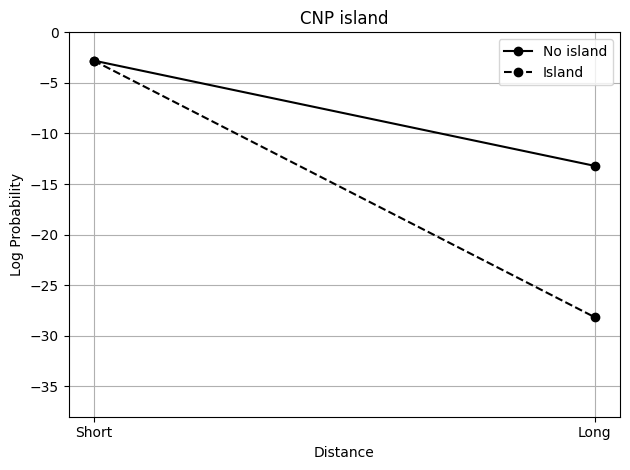

In [12]:
plot_log_prob_simple(p_short_1, p_long_1, p_short_2, p_long_2, title = "CNP island")

In [13]:
paths.extend([" ".join(path1), " ".join(path2), " ".join(path3), " ".join(path4)])
probs.extend([p_short_1, p_short_2, p_long_1, p_long_2])
unattested.extend([un1, un2, un3, un4])
condition.extend(["CNP"]*4)

### 3. EQ island (comp_wh-int), subject extraction

In [14]:
# Short conditions as defined previously
p_long_1, path3, un3 = get_prob(['COMP_nominal', 'SUBJ'], freq_dist, n_gram)  # long no island
p_long_2, path4, un4 = get_prob(['COMP_wh-int', 'SUBJ'], freq_dist, n_gram)  # long island

['start', 'COMP_nominal', 'SUBJ', 'end'] -21.584649728591142 

['start', 'COMP_wh-int', 'SUBJ', 'end'] -21.584649728591142 



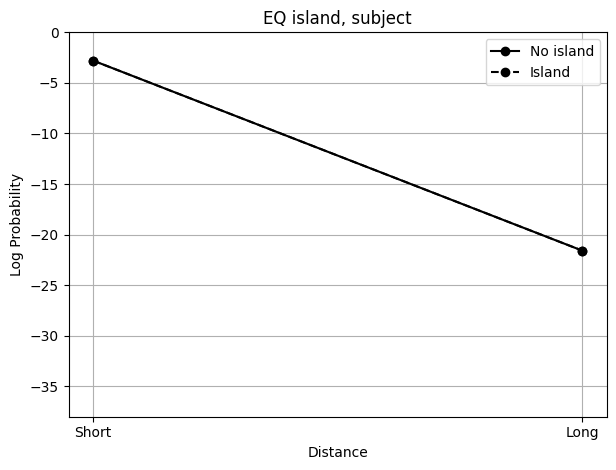

In [15]:
plot_log_prob_simple(p_short_1, p_long_1, p_short_2, p_long_2, title = "EQ island, subject")

In [16]:
paths.extend([" ".join(path1), " ".join(path2), " ".join(path3), " ".join(path4)])
probs.extend([p_short_1, p_short_2, p_long_1, p_long_2])
unattested.extend([un1, un2, un3, un4])
condition.extend(["EQ"]*4)

### 4. EQ island (comp_wh-int), object extraction (reported in the Appendix)

In [17]:
p_short_1, path1, un1 = get_prob(['OBJ'], freq_dist, n_gram)  # short no island
p_short_2, path2, un2 = get_prob(['OBJ'], freq_dist, n_gram)  # short island
p_long_1, path3, un3 = get_prob(['COMP_nominal', 'OBJ'], freq_dist, n_gram)  # long no island
p_long_2, path4, un4 = get_prob(['COMP_wh-int', 'OBJ'], freq_dist, n_gram)  # long island

['start', 'OBJ', 'end'] -2.22691310060886 

['start', 'OBJ', 'end'] -2.22691310060886 

['start', 'COMP_nominal', 'OBJ', 'end'] -13.20556983930454 

['start', 'COMP_wh-int', 'OBJ', 'end'] -21.584649728591142 



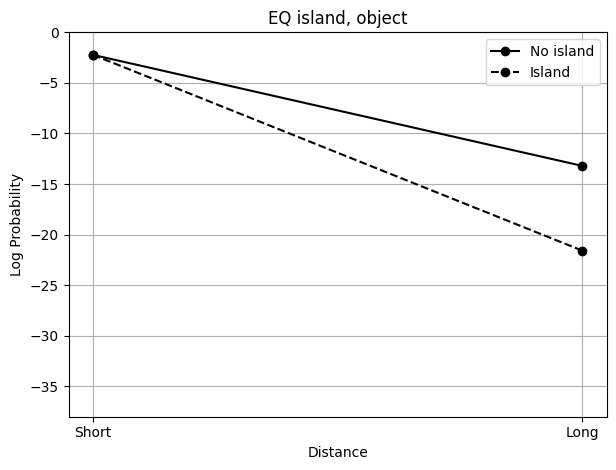

In [18]:
plot_log_prob_simple(p_short_1, p_long_1, p_short_2, p_long_2, title = "EQ island, object")

In [19]:
paths.extend([" ".join(path1), " ".join(path2), " ".join(path3), " ".join(path4)])
probs.extend([p_short_1, p_short_2, p_long_1, p_long_2])
unattested.extend([un1, un2, un3, un4])
condition.extend(["EQ-object"]*4)

### 5. Whether island (comp_pol-int), subject extraction (reported in the Appendix)

In [20]:
p_short_1, path1, un1 = get_prob(['SUBJ'], freq_dist, n_gram)  # short no island
p_short_2, path2, un2 = get_prob(['SUBJ'], freq_dist, n_gram)  # short island
p_long_1, path3, un3 = get_prob(['COMP_nominal', 'SUBJ'], freq_dist, n_gram)  # long no island
p_long_2, path4, un4 = get_prob(['COMP_pol-int', 'SUBJ'], freq_dist, n_gram)  # long island

['start', 'SUBJ', 'end'] -2.790300046079462 

['start', 'SUBJ', 'end'] -2.790300046079462 

['start', 'COMP_nominal', 'SUBJ', 'end'] -21.584649728591142 

['start', 'COMP_pol-int', 'SUBJ', 'end'] -21.584649728591142 



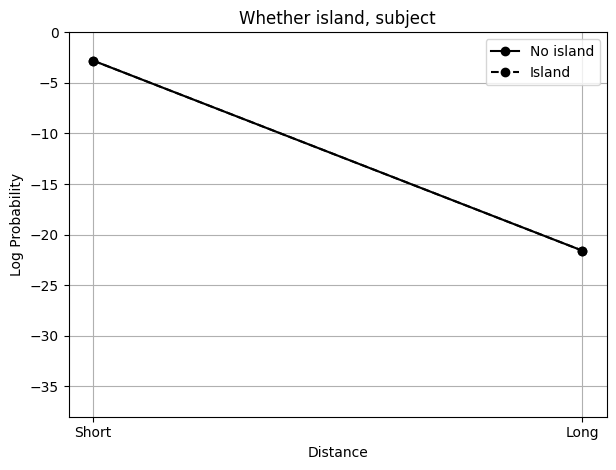

In [21]:
plot_log_prob_simple(p_short_1, p_long_1, p_short_2, p_long_2, title = "Whether island, subject")

In [22]:
paths.extend([" ".join(path1), " ".join(path2), " ".join(path3), " ".join(path4)])
probs.extend([p_short_1, p_short_2, p_long_1, p_long_2])
unattested.extend([un1, un2, un3, un4])
condition.extend(["Whether-subject"]*4)

### 6. Whether island (comp_pol-int), object extraction (reported in the Appendix)

In [23]:
p_short_1, path1, un1 = get_prob(['OBJ'], freq_dist, n_gram)  # short no island
p_short_2, path2, un2 = get_prob(['OBJ'], freq_dist, n_gram)  # short island
p_long_1, path3, un3 = get_prob(['COMP_nominal', 'OBJ'], freq_dist, n_gram)  # long no island
p_long_2, path4, un4 = get_prob(['COMP_pol-int', 'OBJ'], freq_dist, n_gram)  # long island

['start', 'OBJ', 'end'] -2.22691310060886 

['start', 'OBJ', 'end'] -2.22691310060886 

['start', 'COMP_nominal', 'OBJ', 'end'] -13.20556983930454 

['start', 'COMP_pol-int', 'OBJ', 'end'] -21.584649728591142 



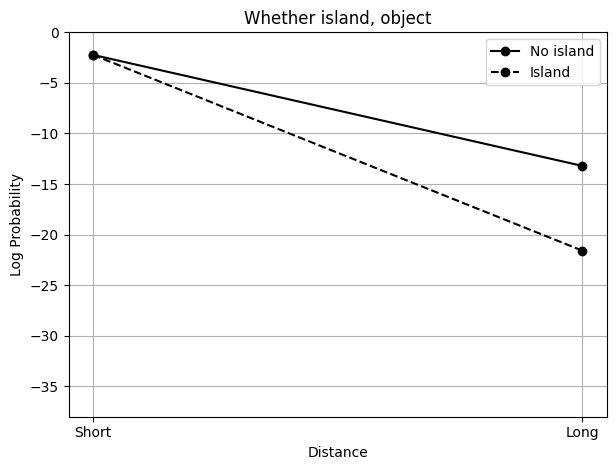

In [24]:
plot_log_prob_simple(p_short_1, p_long_1, p_short_2, p_long_2, title = "Whether island, object")

In [25]:
paths.extend([" ".join(path1), " ".join(path2), " ".join(path3), " ".join(path4)])
probs.extend([p_short_1, p_short_2, p_long_1, p_long_2])
unattested.extend([un1, un2, un3, un4])
condition.extend(["Whether-object"]*4)

### 7. Adjunct island

In [26]:
p_short_1, path1, un1 = get_prob(['SUBJ'], freq_dist, n_gram)  # short no island
p_short_2, path2, un2 = get_prob(['SUBJ'], freq_dist, n_gram)  # short island
p_long_1, path3, un3 = get_prob(['COMP_nominal', 'OBJ'], freq_dist, n_gram)  # long no island
p_long_2, path4, un4 = get_prob(['ADJUNCT_adv', 'OBJ'], freq_dist, n_gram)  # long island

['start', 'SUBJ', 'end'] -2.790300046079462 

['start', 'SUBJ', 'end'] -2.790300046079462 

['start', 'COMP_nominal', 'OBJ', 'end'] -13.20556983930454 

['start', 'ADJUNCT_adv', 'OBJ', 'end'] -21.584649728591142 



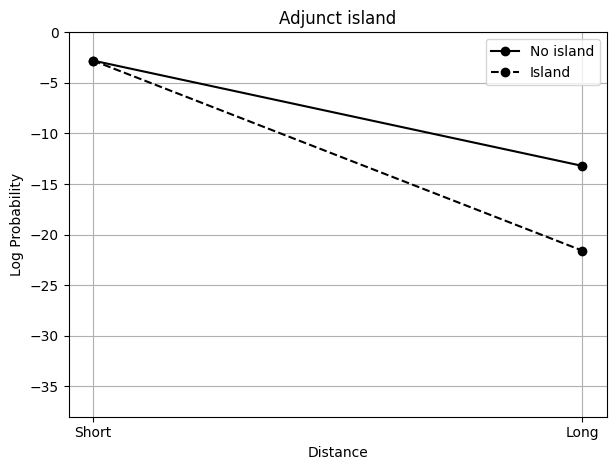

In [27]:
plot_log_prob_simple(p_short_1, p_long_1, p_short_2, p_long_2, title = "Adjunct island")

In [28]:
paths.extend([" ".join(path1), " ".join(path2), " ".join(path3), " ".join(path4)])
probs.extend([p_short_1, p_short_2, p_long_1, p_long_2])
unattested.extend([un1, un2, un3, un4])
condition.extend(["Adjunct"]*4)

### 8. RC island, object extraction, predlink as comparison

In [29]:
p_short_1, path1, un1 = get_prob(['SUBJ'], freq_dist, n_gram)  # short no island
p_short_2, path2, un2 = get_prob(['PREDLINK'], freq_dist, n_gram)  # short island
p_long_2, path4, un4 = get_prob(['ADJUNCT_rel', 'OBJ'], freq_dist, n_gram)  # long island

['start', 'SUBJ', 'end'] -2.790300046079462 

['start', 'PREDLINK', 'end'] -1.8226557605018152 

['start', 'ADJUNCT_rel', 'OBJ', 'end'] -21.584649728591142 



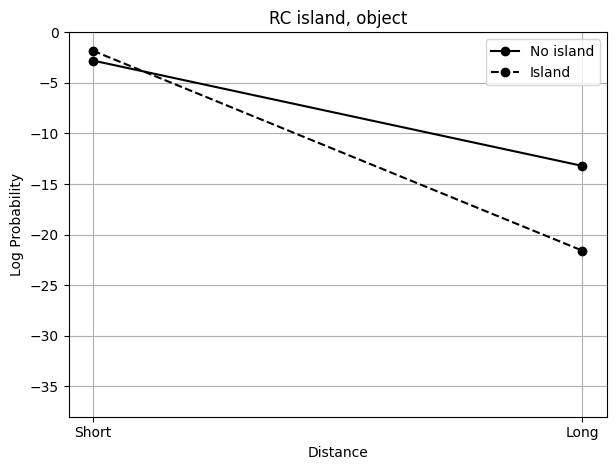

In [30]:
plot_log_prob_simple(p_short_1, p_long_1, p_short_2, p_long_2, title = "RC island, object")

In [31]:
paths.extend([" ".join(path1), " ".join(path2), " ".join(path3), " ".join(path4)])
probs.extend([p_short_1, p_short_2, p_long_1, p_long_2])
unattested.extend([un1, un2, un3, un4])
condition.extend(["RC-predlink"]*4)

### 9. RC island, subject extraction, subj as comparison

In [32]:
p_short_1, path1, un1 = get_prob(['SUBJ'], freq_dist, n_gram)  # short no island
p_short_2, path2, un2 = get_prob(['SUBJ'], freq_dist, n_gram)  # short island
p_long_1, path3, un3 = get_prob(['COMP_nominal', 'SUBJ'], freq_dist, n_gram)  # long no island
p_long_2, path4, un4 = get_prob(['ADJUNCT_rel', 'SUBJ'], freq_dist, n_gram)  # long island

['start', 'SUBJ', 'end'] -2.790300046079462 

['start', 'SUBJ', 'end'] -2.790300046079462 

['start', 'COMP_nominal', 'SUBJ', 'end'] -21.584649728591142 

['start', 'ADJUNCT_rel', 'SUBJ', 'end'] -21.584649728591142 



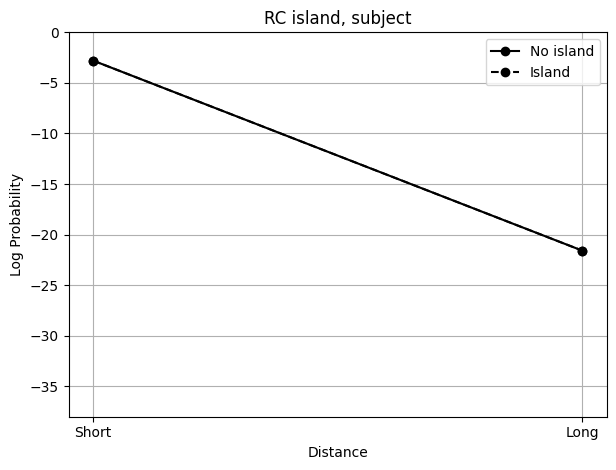

In [33]:
plot_log_prob_simple(p_short_1, p_long_1, p_short_2, p_long_2, title = "RC island, subject")

In [34]:
paths.extend([" ".join(path1), " ".join(path2), " ".join(path3), " ".join(path4)])
probs.extend([p_short_1, p_short_2, p_long_1, p_long_2])
unattested.extend([un1, un2, un3, un4])
condition.extend(["RC-subject"]*4)

## 10. RC island, P-comp extraction

In [35]:
p_short_1, path1, un1 = get_prob(['SUBJ'], freq_dist, n_gram)  # short no island
p_short_2, path2, un2 = get_prob(['SUBJ'], freq_dist, n_gram)  # short island
p_long_1, path3, un3 = get_prob(['COMP_nominal', 'ADJUNCT', 'OBJ'], freq_dist, n_gram)  # long no island
p_long_2, path4, un4 = get_prob(['ADJUNCT_rel', 'ADJUNCT', 'OBJ'], freq_dist, n_gram)  # long island

['start', 'SUBJ', 'end'] -2.790300046079462 

['start', 'SUBJ', 'end'] -2.790300046079462 

['start', 'COMP_nominal', 'ADJUNCT', 'OBJ', 'end'] -19.878930338136392 

['start', 'ADJUNCT_rel', 'ADJUNCT', 'OBJ', 'end'] -25.48840213332135 



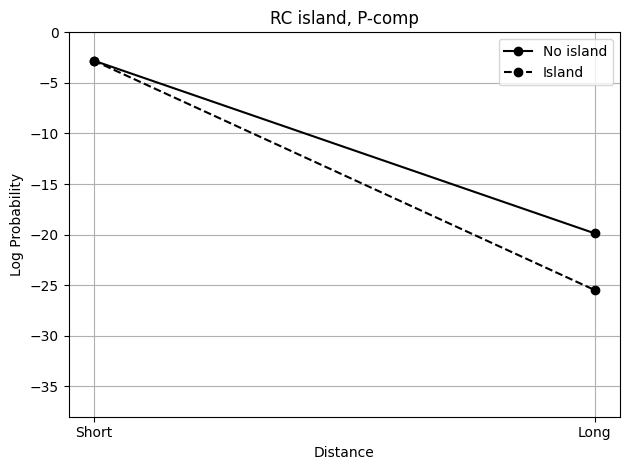

In [36]:
plot_log_prob_simple(p_short_1, p_long_1, p_short_2, p_long_2, title = "RC island, P-comp")

In [37]:
paths.extend([" ".join(path1), " ".join(path2), " ".join(path3), " ".join(path4)])
probs.extend([p_short_1, p_short_2, p_long_1, p_long_2])
unattested.extend([un1, un2, un3, un4])
condition.extend(["RC-Pcomp"]*4)

In [38]:
structure = ["noIsland", "Island", "noIsland", "Island"]*10

In [39]:
distance = ["Short", "Short", "Long", "Long"]*10

In [40]:
dependency = ["Wh"]*40
n_gram = ["Trigram"]*40

In [41]:
df = pd.DataFrame(list(zip(condition, distance, structure, paths, probs, unattested, dependency, n_gram)),
               columns =['condition', 'distance', 'structure', 'path', 'log_probability', 
                         'unattested_ngrams', 'dependency', 'n_gram'])

In [42]:
df.to_csv('/Users/anastasia/Library/CloudStorage/OneDrive-NTNU/Project_R_files/ps-learner/data/model_results_wh_trigrams.csv', index=False)

In [43]:
# All trigrams and their frequency
for key,value in sorted(freq_dist.items()):
    print(key,value)

('ADJUNCT', 'OBJ', 'end') 490
('ADJUNCT', 'SUBJ', 'end') 1
('ADJUNCT', 'XCOMP', 'end') 1
('COMP_inf', 'ADJUNCT', 'end') 1
('COMP_inf', 'OBJ', 'end') 3
('COMP_nominal', 'ADJUNCT', 'OBJ') 3
('COMP_nominal', 'ADJUNCT', 'end') 16
('COMP_nominal', 'OBJ', 'end') 33
('COMP_nominal', 'OBL-TH', 'end') 2
('COMP_nominal', 'PREDLINK', 'end') 18
('COMP_nominal', 'XCOMP', 'ADJUNCT') 10
('COMP_nominal', 'XCOMP', 'OBJ') 34
('COMP_nominal', 'XCOMP', 'OBL-TH') 2
('COMP_nominal', 'XCOMP', 'PREDLINK') 5
('COMP_nominal', 'XCOMP', 'SUBJ') 1
('COMP_nominal', 'XCOMP', 'XCOMP') 3
('OBJ', 'COMP_inf', 'OBJ') 1
('OBJ', 'OBL-TH', 'end') 5
('PREDLINK', 'ADJUNCT', 'OBJ') 13
('PREDLINK', 'ADJUNCT', 'SUBJ') 1
('PREDLINK', 'ADJUNCT', 'end') 79
('PREDLINK', 'COMP_inf', 'OBJ') 2
('PREDLINK', 'OBJ', 'end') 30
('PREDLINK', 'OBL-TH', 'end') 23
('PREDLINK', 'XCOMP', 'OBJ') 1
('XCOMP', 'ADJUNCT', 'OBJ') 131
('XCOMP', 'ADJUNCT', 'end') 1200
('XCOMP', 'COMP_nominal', 'OBJ') 1
('XCOMP', 'COMP_nominal', 'XCOMP') 4
('XCOMP', 'OBJ'